# Image Representation

In this notebook, we would look at image representation and histograms. Also, we would implement a function for skin detection and another for to give color to images.

### Image Representation

Images can be represented as functions of pixel positions. For grayscale images the output of this function is the pixel intensity at a position while for color images, it is a vector containing values for each color channel.

Import packages

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

read in a test image

In [10]:
im_path = "./Resources/guy.png"
test_image = None
# TODO read in the image with name femi.jpg
test_image = cv2.imread(im_path)

displayn test image

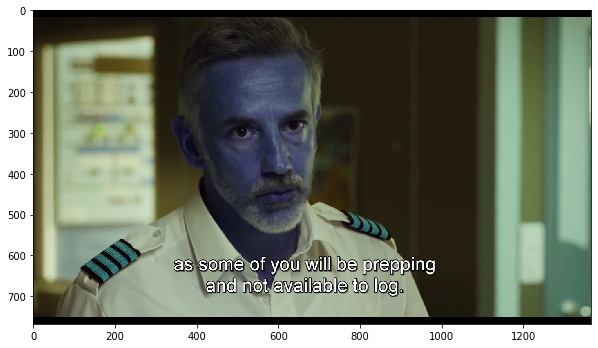

In [11]:
plt.figure(figsize=(10,10))
# TODO display the test image
plt.imshow(test_image)

If the test image is in BGR format, convert it to RGB

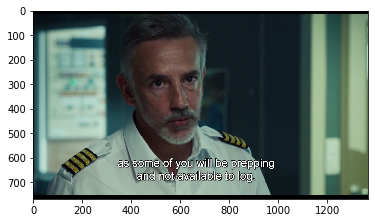

In [12]:
# TODO convert test image to RGB format if it's in BGR

test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)

Create a function that takes in a pixel position and returns the pixel value at that position

In [13]:
def imfunc(x1, x2):
    
    output = None
    ## TODO 
    output = test_image[x1,x2]
    
    return output

computing image histograms:

use cv2.calcHist([images], [channels], None, [bins], [range])

(0, 256)

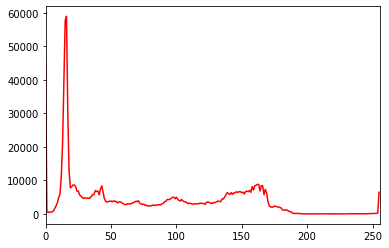

In [14]:
# TODO use the calcHist function in opencv to compute
# the histogram of the image
hist = None
hist = cv2.calcHist([test_image], [0], None, [256], [0, 256])
plt.plot(hist, 'r')
plt.xlim([0,256])

skin detection

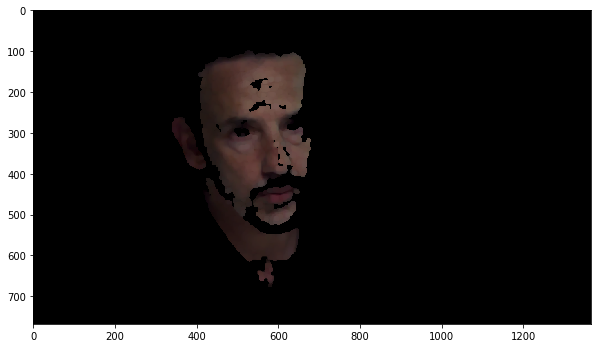

In [15]:
## skin color range in hsv
lower = np.array([0, 0, 0], dtype = "uint8")
upper = np.array([255, 100, 100], dtype = "uint8")

# TODO detect the skin pixels in the test images.
# i.e colors outside the range above
# use cv2.inRange function
skin_pixels = None
skin_pixels = cv2.inRange(test_image, lower, upper)
skin_mask = np.dstack((skin_pixels, skin_pixels, skin_pixels))

# Get the image dimensions
width = test_image.shape[0]
height = test_image.shape[1]

# Split the image into its three channels - rgb
test_image_rgb = np.dsplit(test_image, 3)
test_image_r = np.reshape(test_image_rgb[0], (width, height))
test_image_g = np.reshape(test_image_rgb[1], (width, height))
test_image_b = np.reshape(test_image_rgb[2], (width, height))

# Apply filter condition to red channel
test_image_r = np.where(test_image_r > test_image_g, test_image_r, 0)
test_image_r = np.where(test_image_r > test_image_b, test_image_r, 0)
test_image_r = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_r, 0)

# Apply filter condition to green channel
test_image_g = np.where(test_image_r > test_image_g, test_image_g, 0)
test_image_g = np.where(test_image_r > test_image_b, test_image_g, 0)
test_image_g = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_g, 0)

# Apply filter condition to blue channel
test_image_b = np.where(test_image_r > test_image_g, test_image_b, 0)
test_image_b = np.where(test_image_r > test_image_b, test_image_b, 0)
test_image_b = np.where(np.absolute(test_image_r - test_image_g) > 5, test_image_b, 0)

# Bulid image back from the three channels
test_image_rgb = np.dstack((test_image_r, test_image_g, test_image_b))

# Apply the final skin_mask threshold filter
test_image_skin = np.where(skin_mask, test_image_rgb, 0)

# Dilate and erode the image with the kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
final = cv2.morphologyEx(test_image_skin, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,10))
plt.imshow(final)

<strong>Coloring Greyscal Images<strong>

In [16]:
# Read the colored image
color_im_path = "./test_image.jpeg"
colored_im = cv2.imread(color_im_path)

# Convert the colored image to greyscale
gray_im = cv2.cvtColor(colored_im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_im, cmap='gray', vmin = 0, vmax = 255)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# Generate color channels by performing matrix rolling

# Red Channel
recolor_im_r = np.roll(gray_im, 500, 1)
plt.imshow(recolor_im_r, cmap='OrRd', vmin = 0, vmax = 255)

In [ ]:
# Green Channel
recolor_im_g = gray_im
plt.imshow(recolor_im_g, cmap='YlGn', vmin = 0, vmax = 255)

In [ ]:
# Blue Channel
recolor_im_b = np.roll(gray_im, -500, 1)
plt.imshow(recolor_im_b, cmap='PuBu', vmin = 0, vmax = 255)

In [ ]:
# Build the colored image
recolor_im_rgb = np.dstack((recolor_im_r, recolor_im_g, recolor_im_b))
plt.imshow(recolor_im_rgb)